# Results Analysis
### (when experiments were ran and tracked with weights and biases)
Note that this notebook refers to our Weights and Biases repository.
If you track your own experiments, you have to replace the reference to the runs in `api.run(< your id > )...`

In [70]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
import scipy
import torch_geometric.datasets
import matplotlib.patches as mpatches

api = wandb.Api()
color=['blue', 'blue', 'green', 'green', 'red', 'red']


# 1. Load results from WandB

In [71]:
cora_mlp=api.run("luisawerner/nesy23/21kkd3hn").summary['test_accuracies']
cora_kenn_mlp=api.run("luisawerner/nesy23/3ro8287h").summary['test_accuracies']
cora_gcn=api.run("luisawerner/nesy23/e4g0y8u0").summary['test_accuracies']
cora_kenn_gcn=api.run("luisawerner/nesy23/1agooev5").summary['test_accuracies']
cora_gat=api.run("luisawerner/nesy23/1ip2vw3v").summary['test_accuracies']
cora_kenn_gat=api.run("luisawerner/nesy23/3ob9d8s0").summary['test_accuracies']

In [72]:
pubmed_mlp=api.run("luisawerner/nesy23/3vol5qrs").summary['test_accuracies']
pubmed_kenn_mlp=api.run("luisawerner/nesy23/2tnphpvq").summary['test_accuracies']
pubmed_gcn=api.run("luisawerner/nesy23/sml5bi91").summary['test_accuracies']
pubmed_kenn_gcn=api.run("luisawerner/nesy23/2bkseqxp").summary['test_accuracies']
pubmed_gat = api.run("luisawerner/nesy23/2tnswjml").summary['test_accuracies']
pubmed_kenn_gat = api.run("luisawerner/nesy23/1fv9jhuv").summary['test_accuracies']

In [73]:
citeseer_mlp=api.run("luisawerner/nesy23/6nulutmt").summary['test_accuracies']
citeseer_kenn_mlp=api.run("luisawerner/nesy23/2jhyvc06").summary['test_accuracies']
citeseer_gcn=api.run("luisawerner/nesy23/10w9ru13").summary['test_accuracies']
citeseer_kenn_gcn=api.run("luisawerner/nesy23/lsrwas08").summary['test_accuracies']
citeseer_gat = api.run("luisawerner/nesy23/2qcz3ccs").summary['test_accuracies']
citeseer_kenn_gat = api.run("luisawerner/nesy23/nfvfp6nj").summary['test_accuracies']

In [74]:
flickr_mlp=api.run("luisawerner/nesy23/39y1lkxu").summary['test_accuracies']
flickr_kenn_mlp=api.run("luisawerner/nesy23/18bmvs3p").summary['test_accuracies']
flickr_gcn=api.run("luisawerner/nesy23/2yg139x5").summary['test_accuracies']
flickr_kenn_gcn=api.run("luisawerner/nesy23/2a90jqbn").summary['test_accuracies']
flickr_kenn_gat = api.run("luisawerner/nesy23/byjp9gjy").summary['test_accuracies'][:10]
flickr_gat = api.run("luisawerner/nesy23/yt6ttff6").summary['test_accuracies']

# 2. View Results
## Cora Dataset
Results of one-sided t-test for Cora
H1: mean test accuracy of KE_X > mean test accuracy of X
If p-value below significance threshold --> H1 true

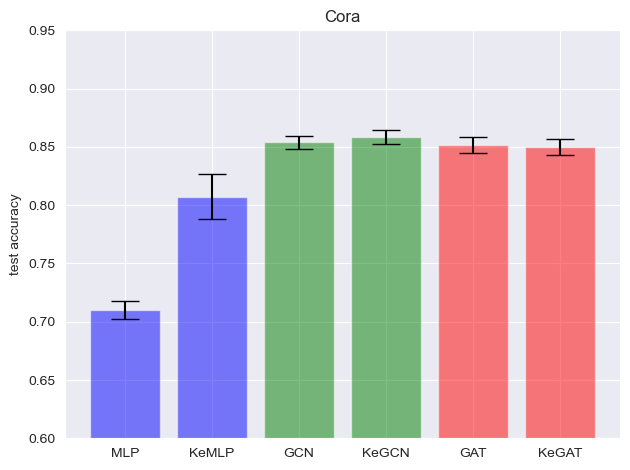

Mean Average Test Accuracy over 50 runs: 
MLP: 0.7098399999999999, KeMLP: 0.8072400000000001
GCN: 0.85382, KeGCN: 0.8586800000000001
GAT: 0.8517199999999999, KeGAT: 0.8498399999999998


p-value KeMLP > MLP for Cora: 3.9986805821323845e-55
p-value KeGCN > GCN for Cora: 3.0847335812368674e-05
p-value KeGAT > GAT for Cora: 0.9181665832178568
p-value KeGCN > KeMLP for Cora: 3.7829950148208544e-33
p-value KeGAT > KeMLP for Cora: 6.4010604845744646e-27
p-value GCN > KeMLP for Cora: 4.9784289873789096e-30
p-value GAT > KeMLP for Cora: 3.998958726481553e-28


In [75]:

xpos = np.arange(6)
cora_means = [np.mean(cora_mlp), np.mean(cora_kenn_mlp), np.mean(cora_gcn), np.mean(cora_kenn_gcn), np.mean(cora_gat), np.mean(cora_kenn_gat)]
cora_errors = [np.std(cora_mlp), np.std(cora_kenn_mlp), np.std(cora_gcn), np.std(cora_kenn_gcn), np.std(cora_gat), np.std(cora_kenn_gat)]
fig, ax = plt.subplots()
ax.bar(xpos, cora_means, yerr=cora_errors, align='center', alpha=0.5, ecolor='black', capsize=10, color=color)
ax.set_ylabel('test accuracy')
ax.set_xticks(xpos)
ax.set_xticklabels(['MLP', 'KeMLP', 'GCN', 'KeGCN', 'GAT', 'KeGAT'])
ax.set_title('Cora')
ax.yaxis.grid(True)

# Save the figure and show
plt.ylim(0.6, 0.95)
plt.tight_layout()
plt.savefig('figures/results_cora.pdf', format='pdf')
plt.show()
plt.close()

print(f'Mean Average Test Accuracy over {len(pubmed_mlp)} runs: ')
print(f'MLP: {np.mean(cora_mlp)}, KeMLP: {np.mean(cora_kenn_mlp)}' )
print(f'GCN: {np.mean(cora_gcn)}, KeGCN: {np.mean(cora_kenn_gcn)}' )
print(f'GAT: {np.mean(cora_gat)}, KeGAT: {np.mean(cora_kenn_gat)}' )
print ('\n')

print(f'p-value KeMLP > MLP for Cora: {scipy.stats.ttest_ind(cora_kenn_mlp, cora_mlp, alternative="greater")[1]}')
print(f'p-value KeGCN > GCN for Cora: {scipy.stats.ttest_ind(cora_kenn_gcn, cora_gcn, alternative="greater")[1]}')
print(f'p-value KeGAT > GAT for Cora: {scipy.stats.ttest_ind(cora_kenn_gat, cora_gat, alternative="greater")[1]}')
print(f'p-value KeGCN > KeMLP for Cora: {scipy.stats.ttest_ind(cora_kenn_gcn, cora_kenn_mlp, alternative="greater")[1]}')
print(f'p-value KeGAT > KeMLP for Cora: {scipy.stats.ttest_ind(cora_kenn_gat, cora_kenn_mlp, alternative="greater")[1]}')
print(f'p-value GCN > KeMLP for Cora: {scipy.stats.ttest_ind(cora_gcn, cora_kenn_mlp, alternative="greater")[1]}')
print(f'p-value GAT > KeMLP for Cora: {scipy.stats.ttest_ind(cora_gat, cora_kenn_mlp, alternative="greater")[1]}')

# CiteSeer Dataset

Mean Average Test Accuracy over 50 runs: 
MLP: 0.7278200000000001, KeMLP: 0.7528800000000001
GCN: 0.7479600000000001, KeGCN: 0.75062
GAT: 0.7718200000000001, KeGAT: 0.7734399999999999


p-value KeMLP > MLP for CiteSeer: 5.236566694584563e-31
p-value KeGCN > GCN for CiteSeer: 0.09065088587292602
p-value KeGAT > GAT for CiteSeer: 0.13332461658163747
p-value KeGCN > KeMLP for CiteSeer: 0.9120410186617941
p-value KeGAT > KeMLP for CiteSeer: 8.184478677899699e-27
p-value GCN > KeMLP for CiteSeer: 0.997395306376998
p-value GAT > KeMLP for CiteSeer: 1.6840752433361753e-24


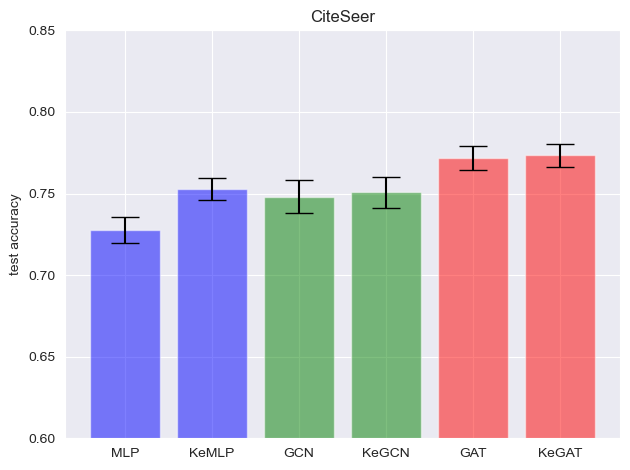

In [76]:
xpos = np.arange(6)
citeseer_means = [np.mean(citeseer_mlp), np.mean(citeseer_kenn_mlp), np.mean(citeseer_gcn), np.mean(citeseer_kenn_gcn), np.mean(citeseer_gat), np.mean(citeseer_kenn_gat)]
citeseer_errors = [np.std(citeseer_mlp), np.std(citeseer_kenn_mlp), np.std(citeseer_gcn), np.std(citeseer_kenn_gcn), np.std(citeseer_gat), np.std(citeseer_kenn_gat)]
fig, ax = plt.subplots()
ax.bar(xpos, citeseer_means, yerr=citeseer_errors, align='center', alpha=0.5, ecolor='black', capsize=10, color=color)
ax.set_ylabel('test accuracy')
ax.set_xticks(xpos)
ax.set_xticklabels(['MLP', 'KeMLP', 'GCN', 'KeGCN', 'GAT', 'KeGAT'])
ax.set_title('CiteSeer')
ax.yaxis.grid(True)

# Save the figure and show
plt.ylim(0.6, 0.85)
plt.tight_layout()
plt.savefig('figures/results_citeseer.pdf', format='pdf')
# plt.show()

print(f'Mean Average Test Accuracy over {len(pubmed_mlp)} runs: ')
print(f'MLP: {np.mean(citeseer_mlp)}, KeMLP: {np.mean(citeseer_kenn_mlp)}' )
print(f'GCN: {np.mean(citeseer_gcn)}, KeGCN: {np.mean(citeseer_kenn_gcn)}' )
print(f'GAT: {np.mean(citeseer_gat)}, KeGAT: {np.mean(citeseer_kenn_gat)}' )
print ('\n')



print(f'p-value KeMLP > MLP for CiteSeer: {scipy.stats.ttest_ind(citeseer_kenn_mlp, citeseer_mlp, alternative="greater")[1]}')
print(f'p-value KeGCN > GCN for CiteSeer: {scipy.stats.ttest_ind(citeseer_kenn_gcn, citeseer_gcn, alternative="greater")[1]}')
print(f'p-value KeGAT > GAT for CiteSeer: {scipy.stats.ttest_ind(citeseer_kenn_gat, citeseer_gat, alternative="greater")[1]}')
print(f'p-value KeGCN > KeMLP for CiteSeer: {scipy.stats.ttest_ind(citeseer_kenn_gcn, citeseer_kenn_mlp, alternative="greater")[1]}')
print(f'p-value KeGAT > KeMLP for CiteSeer: {scipy.stats.ttest_ind(citeseer_kenn_gat, citeseer_kenn_mlp, alternative="greater")[1]}')
print(f'p-value GCN > KeMLP for CiteSeer: {scipy.stats.ttest_ind(citeseer_gcn, citeseer_kenn_mlp, alternative="greater")[1]}')
print(f'p-value GAT > KeMLP for CiteSeer: {scipy.stats.ttest_ind(citeseer_gat, citeseer_kenn_mlp, alternative="greater")[1]}')


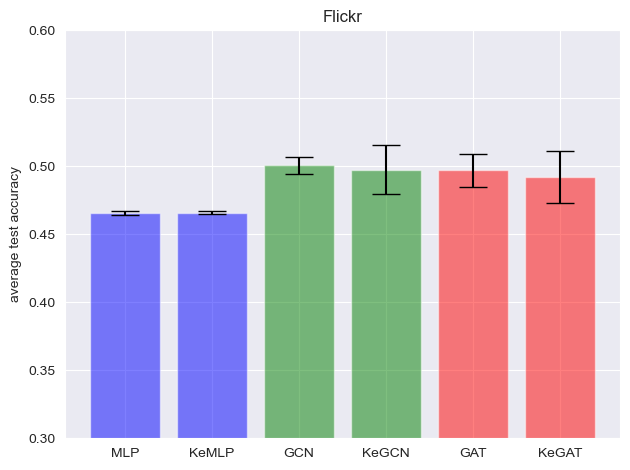

Mean Average Test Accuracy over 10 runs: 
MLP: 0.465634383543226 (0.0017608032302256005), KeMLP: 0.46592569354188146 (0.0013005867928203446)
GCN: 0.5007036256890601 (0.006364154539571432), KeGCN: 0.4974409537041186 (0.017933179062878835)
GAT: 0.497010711244566 (0.012362564379906273), KeGAT: 0.49199569757540446 (0.018938482513340623)


p-value KeMLP > MLP for Flickr: 0.34721129645060733
p-value KeGCN > GCN for Flickr: 0.6933761050409264
p-value KeGAT > GAT for Flickr: 0.7428307754394381
p-value KeGAT > KeMLP for Flickr: 0.00032149620029081773
p-value GCN > KeMLP for Flickr: 2.040930829165464e-12
p-value GAT > KeMLP for Flickr: 3.0230399893950025e-07


In [77]:
# flickr
color=['blue', 'blue', 'green', 'green', 'red', 'red']
xpos = np.arange(6)
flickr_means = [np.mean(flickr_mlp), np.mean(flickr_kenn_mlp), np.mean(flickr_gcn), np.mean(flickr_kenn_gcn), np.mean(flickr_gat), np.mean(flickr_kenn_gat)]
flickr_errors = [np.std(flickr_mlp), np.std(flickr_kenn_mlp), np.std(flickr_gcn), np.std(flickr_kenn_gcn), np.std(flickr_gat), np.std(flickr_kenn_gat)]
fig, ax = plt.subplots()
ax.bar(xpos, flickr_means, yerr=flickr_errors, align='center', alpha=0.5, ecolor='black', capsize=10, color=color)
ax.set_ylabel('average test accuracy')
ax.set_xticks(xpos)
ax.set_xticklabels(['MLP', 'KeMLP', 'GCN', 'KeGCN', 'GAT', 'KeGAT'])
ax.set_title('Flickr')
ax.yaxis.grid(True)

# Save the figure and show
plt.ylim(0.3, 0.6)
plt.tight_layout()
plt.savefig('figures/results_flickr.pdf', format='pdf')
plt.show()
print(f'Mean Average Test Accuracy over {len(flickr_mlp)} runs: ')
print(f'MLP: {np.mean(flickr_mlp)} ({np.std(flickr_mlp)}), KeMLP: {np.mean(flickr_kenn_mlp)} ({np.std(flickr_kenn_mlp)})' )
print(f'GCN: {np.mean(flickr_gcn)} ({np.std(flickr_gcn)}), KeGCN: {np.mean(flickr_kenn_gcn)} ({np.std(flickr_kenn_gcn)})' )
print(f'GAT: {np.mean(flickr_gat)} ({np.std(flickr_gat)}), KeGAT: {np.mean(flickr_kenn_gat)} ({np.std(flickr_kenn_gat)})' )
print ('\n')

print(f'p-value KeMLP > MLP for Flickr: {scipy.stats.ttest_ind(flickr_kenn_mlp, flickr_mlp, alternative="greater")[1]}')
print(f'p-value KeGCN > GCN for Flickr: {scipy.stats.ttest_ind(flickr_kenn_gcn, flickr_gcn, alternative="greater")[1]}')
print(f'p-value KeGAT > GAT for Flickr: {scipy.stats.ttest_ind(flickr_kenn_gat, flickr_gat, alternative="greater")[1]}')
print(f'p-value KeGAT > KeMLP for Flickr: {scipy.stats.ttest_ind(flickr_kenn_gat, flickr_kenn_mlp, alternative="greater")[1]}')
print(f'p-value GCN > KeMLP for Flickr: {scipy.stats.ttest_ind(flickr_gcn, flickr_kenn_mlp, alternative="greater")[1]}')
print(f'p-value GAT > KeMLP for Flickr: {scipy.stats.ttest_ind(flickr_gat, flickr_kenn_mlp, alternative="greater")[1]}')


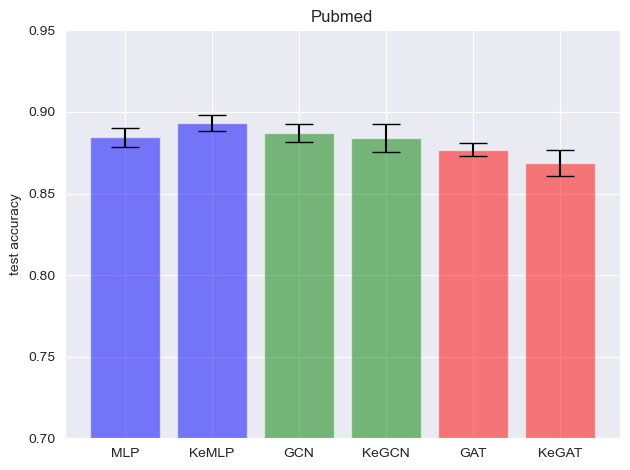

Mean Average Test Accuracy over 50 runs: 
MLP: 0.8844399999999999 (0.005738153012947638), KeMLP: 0.8930599999999999 (0.004768270126576308)
GCN: 0.8870199999999998 (0.0053497289650972085), KeGCN: 0.884 (0.008708616422830905)
GAT: 0.87688 (0.003957979282411673), KeGAT: 0.8687599999999999 (0.008130338246346219)


p-value KeMLP > MLP for PubMed: 8.243639036545687e-13
p-value KeGCN > GCN for PubMed: 0.9793811522051503
p-value KeGAT > GAT for PubMed: 0.9999999954683192


In [78]:
# PubMed
xpos = np.arange(6)
means = [np.mean(pubmed_mlp), np.mean(pubmed_kenn_mlp), np.mean(pubmed_gcn), np.mean(pubmed_kenn_gcn), np.mean(pubmed_gat), np.mean(pubmed_kenn_gat)]
errors = [np.std(pubmed_mlp), np.std(pubmed_kenn_mlp), np.std(pubmed_gcn), np.std(pubmed_kenn_gcn), np.std(pubmed_gat), np.std(pubmed_kenn_gat)]
fig, ax = plt.subplots()
ax.bar(xpos, means, yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=10, color=color)
ax.set_ylabel('test accuracy')
ax.set_xticks(xpos)
ax.set_xticklabels(['MLP', 'KeMLP', 'GCN', 'KeGCN', 'GAT', 'KeGAT'])
ax.set_title('Pubmed')
ax.yaxis.grid(True)

# Save the figure and show
plt.ylim(0.7, 0.95)
plt.tight_layout()
plt.savefig('figures/results_pubmed.pdf', format='pdf')
plt.show()

print(f'Mean Average Test Accuracy over {len(pubmed_mlp)} runs: ')
print(f'MLP: {np.mean(pubmed_mlp)} ({np.std(pubmed_mlp)}), KeMLP: {np.mean(pubmed_kenn_mlp)} ({np.std(pubmed_kenn_mlp)})' )
print(f'GCN: {np.mean(pubmed_gcn)} ({np.std(pubmed_gcn)}), KeGCN: {np.mean(pubmed_kenn_gcn)} ({np.std(pubmed_kenn_gcn)})' )
print(f'GAT: {np.mean(pubmed_gat)} ({np.std(pubmed_gat)}), KeGAT: {np.mean(pubmed_kenn_gat)} ({np.std(pubmed_kenn_gat)})' )
print ('\n')
print(f'p-value KeMLP > MLP for PubMed: {scipy.stats.ttest_ind(pubmed_kenn_mlp, pubmed_mlp, alternative="greater")[1]}')
print(f'p-value KeGCN > GCN for PubMed: {scipy.stats.ttest_ind(pubmed_kenn_gcn, pubmed_gcn, alternative="greater")[1]}')
print(f'p-value KeGAT > GAT for PubMed: {scipy.stats.ttest_ind(pubmed_kenn_gat, pubmed_gat, alternative="greater")[1]}')


## Clause weight analysis
Compute the a-priori clause compliance before running the experiments on the dataset.
It indicates how well each clause is satisfied, see notations in the paper.
Each values correspond to the respective Class Number $i$ and to the Clause:
$\forall (x,y): \neg Cls_i(x) \lor \neg Link(x,y) \lor Cls_i(y)$


In [79]:

def compute_compliance(data, num_classes):
    """
    compute clause compliance per iteration
    returns a list of length |number classes| with compliance value per each
    """
    # y = model.data.y.cpu().detach().numpy() do we need to detach or is this even slowing down the code?
    y = data.y.numpy()
    edge_index = np.transpose(data.edge_index.numpy())
    train_mask = data.train_mask.numpy()
    train_edge_mask = np.logical_or(train_mask[edge_index[:, 0]], train_mask[edge_index[:, 1]])

    # calculate the classes corresponding to edge index
    edge_index_cls = np.zeros_like(edge_index)
    for row in range(edge_index.shape[0]):
        edge_index_cls[row, 0] = y[edge_index[row, 0]]
        edge_index_cls[row, 1] = y[edge_index[row, 1]]

    compliance = []
    for cls in range(num_classes):
        cls_mask = np.logical_or(edge_index_cls[:, 0] == cls, edge_index_cls[:, 1] == cls)
        mask = np.logical_and(cls_mask, train_edge_mask) # edges that have at least a training node and a node of class cls
        same_mask = np.logical_and(mask, np.equal(edge_index_cls[:, 0], edge_index_cls[:, 1])) # edges that are of the above set and have the same class for both nodes
        cls_compliance = sum(same_mask)/sum(mask)
        compliance.append(cls_compliance)

    return compliance

In [80]:
[cora_dataset] = torch_geometric.datasets.Planetoid(root='Cora', name='Cora', split="full")
[citeseer_dataset] = torch_geometric.datasets.Planetoid(root='CiteSeer', name='CiteSeer', split="full")
[pubmed_dataset] = torch_geometric.datasets.Planetoid(root='PubMed', name='PubMed', split="full")
[flickr_dataset] = getattr(torch_geometric.datasets, 'Flickr')(root='Flickr')

## Clause Weight Analysis for KeMLP, CiteSeer, 50 runs

In [81]:
# Load clause weights for citeseer
num_classes = 6
num_runs = 50
citeseer_keMLP = eval(api.run("luisawerner/nesy23/2jhyvc06").summary['logged_clause_weights'])
citeseer_keGCN = eval(api.run("luisawerner/nesy23/lsrwas08").summary['logged_clause_weights'])
citeseer_keGAT = eval(api.run("luisawerner/nesy23/nfvfp6nj").summary['logged_clause_weights'])

Class 0, Layer 0: Mean of learned clause weight over runs: 0.26181708998978137, std clause weight: 0.1154828759378035
Class 1, Layer 0: Mean of learned clause weight over runs: 0.5589083027839661, std clause weight: 0.10722976960608903
Class 2, Layer 0: Mean of learned clause weight over runs: 0.4597557330131531, std clause weight: 0.07048110876242997
Class 3, Layer 0: Mean of learned clause weight over runs: 0.6695162296295166, std clause weight: 0.15115924230904304
Class 4, Layer 0: Mean of learned clause weight over runs: 0.733261729478836, std clause weight: 0.15841206592031695
Class 5, Layer 0: Mean of learned clause weight over runs: 0.7155715578794479, std clause weight: 0.15504454028652984


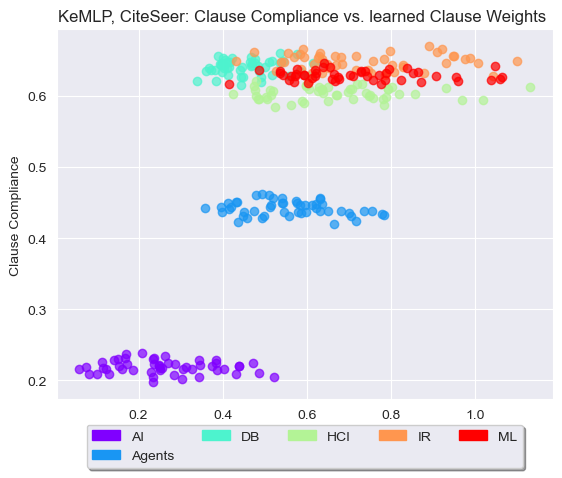

In [82]:
num_layers=1

color = plt.cm.rainbow(np.linspace(0, 1, num_classes))
for cls in range(num_classes):
    for layer in range(num_layers):
        cls_list = [citeseer_keMLP[i][layer][str(cls)][-1] for i in range(num_runs)]
        print(f'Class {cls}, Layer {layer}: Mean of learned clause weight over runs: {np.mean(cls_list)}, std clause weight: {np.std(cls_list)}')

plt.figure()

citeseer_compliance = compute_compliance(citeseer_dataset, num_classes=num_classes)

patches = []
classes_citeSeer=['AI', 'Agents', 'DB', 'HCI', 'IR', 'ML']
for k, j in enumerate(range(num_classes)):
    patches.append(mpatches.Patch(color=color[k], label=classes_citeSeer[j]))
    _list = [citeseer_keMLP[i][0][str(j)][-1] for i in range(num_runs)]
    for i in _list:
        plt.scatter(i, citeseer_compliance[k] + np.random.normal(-0.01, 0.01)
                    , color=color[k], alpha=0.7)

plt.ylabel('Clause Compliance')
plt.xlabel('Learned Clause Weight')
#plt.legend(handles=patches)
plt.title('KeMLP, CiteSeer: Clause Compliance vs. learned Clause Weights ')
plt.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.05),
           fancybox=True, shadow=True, ncol=5)
plt.show()


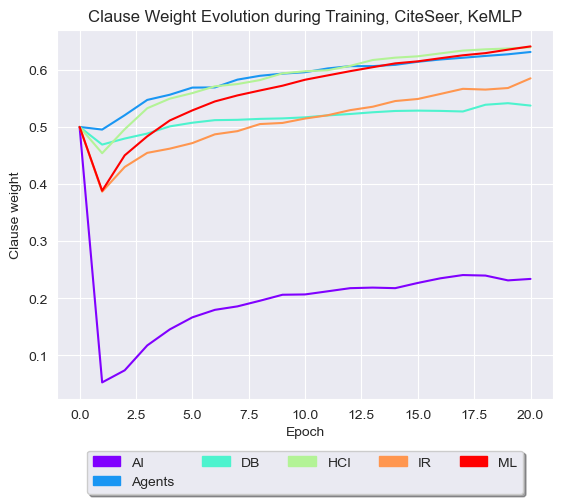

In [83]:
run = 9

for k, j in enumerate(range(num_classes)):
    _list = citeseer_keMLP[run][0][str(j)]
    plt.plot(_list, color=color[k])
plt.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.12),
           fancybox=True, shadow=True, ncol=5)
plt.ylabel('Clause weight')
plt.xlabel('Epoch')
plt.title('Clause Weight Evolution during Training, CiteSeer, KeMLP')
plt.show()

## Clause Weight Analysis KeGCN, CiteSeer, 50 runs

Class 0, Layer 0: Mean of learned clause weight over runs: 0.08904022110742517, std clause weight: 0.10023328962135504
Class 0, Layer 1: Mean of learned clause weight over runs: 0.09091285024478565, std clause weight: 0.09290821472341014
Class 0, Layer 2: Mean of learned clause weight over runs: 0.09503407170413994, std clause weight: 0.08955175060839203
Class 1, Layer 0: Mean of learned clause weight over runs: 0.536179497539997, std clause weight: 0.24311535092248568
Class 1, Layer 1: Mean of learned clause weight over runs: 0.530592385828495, std clause weight: 0.22749175228803836
Class 1, Layer 2: Mean of learned clause weight over runs: 0.5322745367884636, std clause weight: 0.2256027161761762
Class 2, Layer 0: Mean of learned clause weight over runs: 0.039621257334947584, std clause weight: 0.07716613869538516
Class 2, Layer 1: Mean of learned clause weight over runs: 0.028618221755605192, std clause weight: 0.058418254612256214
Class 2, Layer 2: Mean of learned clause weight ove

/var/folders/1n/gv8zs7ld72g24l1skjhbh30c0000gn/T/ipykernel_96745/1247175294.py:23: RuntimeWarning: invalid value encountered in long_scalars
  cls_compliance = sum(same_mask)/sum(mask)


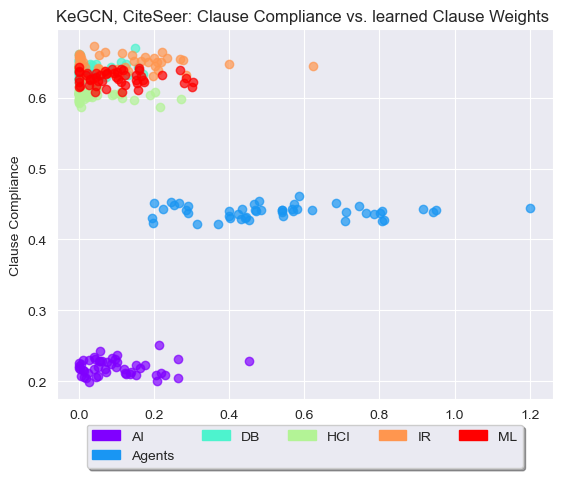

In [84]:
color = plt.cm.rainbow(np.linspace(0, 1, num_classes))

num_layers=3
for cls in range(num_classes):
    for layer in range(num_layers):
        cls_list = [citeseer_keGCN[i][layer][str(cls)][-1] for i in range(num_runs)]
        print(f'Class {cls}, Layer {layer}: Mean of learned clause weight over runs: {np.mean(cls_list)}, std clause weight: {np.std(cls_list)}')

citeseer_compliance = compute_compliance(citeseer_dataset, num_classes=num_runs)

#for l in range(3):
plt.figure()
for k, j in enumerate(range(num_classes)):
    _list = [citeseer_keGCN[i][2][str(j)][-1] for i in range(50)]
    for i in _list:
        plt.scatter(i, citeseer_compliance[k] + np.random.normal(-0.01, 0.01)
                    , color=color[k], alpha=0.7)

plt.ylabel('Clause Compliance')
plt.xlabel('Learned Clause Weight')
plt.title('KeGCN, CiteSeer: Clause Compliance vs. learned Clause Weights ')
plt.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.show()


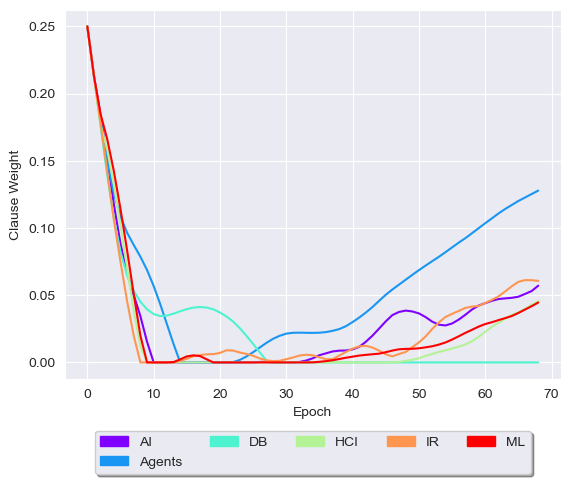

In [85]:
run = 13

classes_citeSeer=['AI', 'Agents', 'DB', 'HCI', 'IR', 'ML']
for k, j in enumerate(range(num_classes)):
    _list = citeseer_keGCN[run][0][str(j)]
    plt.plot(_list, color=color[k])
plt.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.12),
           fancybox=True, shadow=True, ncol=5)
plt.ylabel('Clause Weight')
plt.xlabel('Epoch')
plt.savefig('figures/CiteSeer_KeGCN_cw_evolution.pdf', format='pdf', bbox_inches = 'tight')
plt.show()